### Collaborative Filtering

Jay Urbain, PhD

**References:**

Rajaraman, A., & Ullman, J. D. (2012). Mining of massive datasets (Vol. 1). Cambridge: Cambridge University Press.
http://mmds.org/


Thomas W. Malone and Michael S. Bernstein (Editors), The Collective Intelligence Handbook [tentative title], accessed April 24, 2016.

- http://cci.mit.edu/CIchapterlinks.html
- https://www.edge.org/conversation/thomas_w__malone-collective-intelligenceSegaran, T. (2007). Programming collective intelligence: building smart web 2.0 applications. " O'Reilly Media, Inc."

Surowiecki, J. (2005). The wisdom of crowds. Anchor.

Georgi, S., & Jung, R. (2012). Collective intelligence model: How to describe collective intelligence. In Advances in Collective Intelligence 2011 (pp. 53-64). Springer Berlin Heidelberg. Retrieved January 2, 2014 from 

Kittur, A., & Kraut, R. E. (2008). Harnessing the wisdom of crowds in wikipedia: Quality through coordination. In Proceedings of the 2008 ACM conference on Computer supported cooperative work (pp. 37-46). ACM. Retrieved January 2, 2016. 


### Collective Intelligence

Tomas Mallone:

*"Intelligence is not just something that happens inside individual brains. It also arises with groups of individuals. In fact, I'd define collective intelligence as groups of individuals acting collectively in ways that seem intelligent. By that definition, of course, collective intelligence has been around for a very long time. Families, companies, countries, and armies: those are all examples of groups of people working together in ways that at least sometimes seem intelligent."*

### Collaborative Filtering

Collective intelligence is shared or group intelligence that emerges from the collaboration, collective efforts, and competition of many individuals and appears in consensus decision making. 

Collaborative filtering is an application of collective intelligence where we can search a large group of people (or items) and find  people with similar preferences.

Collaboraitve filtering was first used by David Goldberg at Xerox PARC in 1992 in a paper called *"Using collaboritve filtering to weave an information tapestry."* He designed a system called *Tapestry* that allowed people to annotate a document as interesting or not interesting and used this information to filter documents for other people.

Collaborative filtering systems have many forms, but many common systems can be reduced to two steps:

1. Look for users who share the same rating patterns with the active user (the user whom the prediction is for).
2. Use the ratings from those like-minded users found in step 1 to calculate a prediction for the active user.

This falls under the category of user-based collaborative filtering. A specific application of this is the user-based Nearest Neighbor algorithm.

Alternatively, item-based collaborative filtering (users who bought x also bought y), proceeds in an item-centric manner:

1. Build an item-item matrix determining relationships between pairs of items
2. Infer the tastes of the current user by examining the matrix and matching that user's data

Below, we look at a basic example for each case.

### Collecting Preferences

People and their ratings from *1 to 5*.

In [9]:
# plots within notebook versus launching a separate window
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# A nested dictionary of movie reviewers and their ratings of a set of movies
reviews={'Olga Imas': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.8,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Russ Meier': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Eric Durant': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0, 'You, Me and Dupree':4.2},
'Steve Williams': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Chris Taylor': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Mark Hornick': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Jay Urbain': {'Snakes on a Plane':4.4,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

In [10]:
# Validate
print (reviews['Russ Meier']['Snakes on a Plane'])
print (reviews['Russ Meier'])

3.5
{'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 'Snakes on a Plane': 3.5, 'Lady in the Water': 3.0, 'You, Me and Dupree': 3.5}


### Finding similar people

Defining a similarity score to compare each person with every other person.

Two basic methods:
- Euclidean distance
- Pearson correlation coefficient

Many more:
- Jaccard similarity
- Cosine similarity
- Association rules

### Preference space

A similarity score can be calculated between people in a movie review preference space.

The following code generates the figure below showing people ploted in a preference space of two movies. As we add additional movies we move to a higher dimensional preference space.

Russ Meier 3.5 3.5
Steve Williams 2.5 3.5
Jay Urbain 1.0 4.4
Mark Hornick 3.5 4.0
Eric Durant 4.2 3.0
Olga Imas 2.5 3.8
Chris Taylor 2.0 4.0


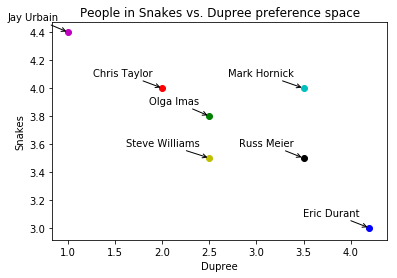

In [11]:
X = []
Y = []
labels = []
colors = list("rgbcmyk")
for label in reviews.keys():
    review_dict = reviews.get(label)
    if 'You, Me and Dupree' in review_dict and 'Snakes on a Plane' in review_dict:
        x = review_dict['You, Me and Dupree']
        y = review_dict['Snakes on a Plane']
        #print x, y
        X.append(x)
        Y.append(y)
        labels.append(label)
        plt.scatter(x,y,color=colors.pop())

for label, x, y in zip(labels, X, Y):
    print (label, x, y)
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
    #    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )
    
#plt.legend(labels)
plt.ylabel('Snakes')
plt.xlabel('Dupree')
plt.title('People in Snakes vs. Dupree preference space')
plt.show()

### Euclidean distance

A basic similarity score can be calculated using the Euclidean distance between any two people in this preference space.

$d = \sqrt{ \sum_i^n(p_i-q_i)^2}$

In [13]:
from math import sqrt

def distance(x1, y1, x2, y2):
    return sqrt( pow(x1-x2,2)+pow(y1-y2,2) )

print ('Hornick and Williams distance preference space:')
print (distance(reviews['Mark Hornick']['Snakes on a Plane'],
               reviews['Mark Hornick']['You, Me and Dupree'],
               reviews['Steve Williams']['Snakes on a Plane'],
               reviews['Steve Williams']['You, Me and Dupree']) )

print ('Hornick and Durant distance in preference space:')
print (distance(reviews['Mark Hornick']['Snakes on a Plane'],
               reviews['Mark Hornick']['You, Me and Dupree'],
               reviews['Eric Durant']['Snakes on a Plane'],
               reviews['Eric Durant']['You, Me and Dupree']))

Hornick and Williams distance preference space:
1.118033988749895
Hornick and Durant distance in preference space:
1.2206555615733703


We can convert the distance measurement into a similarity coefficient $SC$ by inverting the distance and adding 1 (to prevent divide by zero). This function will always return a result between 0 and 1. Where 1 indicates people have identical preferences.

$sc = \dfrac{1}{1+\sqrt{ \sum_i^n(p_i-q_i)^2}}$


#### Q1) Calculate a similarity coefficient (using the sc formula above) for Mark Honick and Steve Williams for the movies: 'Snakes on a Plane' and 'You, Me and Dupree'.


#### Q2) Encapsulate the Euclidean-based similarity coefficient into a function *sim_distance(prefs, person1, person2)* that calculates the similarity between *person1* and *person2* across all reviews.

Use your funciton to calculate the sc for the following:

sim_distance(reviews , 'Mark Hornick', 'Steve Williams')

In [14]:
sim_distance(reviews , 'Mark Hornick', 'Steve Williams')

NameError: name 'sim_distance' is not defined

### Pearson correlation coefficient

The Pearson correlation coefficient is a measure of the linear correlation between two variables $X$ and $Y$, giving a value between +1 and −1 inclusive. A value of 1 indicates total positive correlation, 0 indicates no correlation, and −1 indicates total negative correlation. It is a widely used measure of the degree of linear dependence between two variables, i.e., how two variables fit a straight line.

$r = \dfrac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{(x_i-\bar{x})^2}\sqrt{(y_i-\bar{y})^2}}$

*Note: Correlation is essentially a mean-centered cosine score that measures how two variables vary with respect to each other. It corrects for one reviewer consisitantly rating higher or lower than another reviewer. I.e., corrects for rater inflation.*

A similarity function based on the Pearson Correlation coefficent is provided for you below:

In [15]:
# Returns the Pearson correlation coefficient for p1 and p2
import math
def sim_corr(prefs,p1,p2):
  # Get the list of mutually rated items
  si={}
  for item in prefs[p1]: 
    if item in prefs[p2]: si[item]=1

  # if they are no ratings in common, return 0
  if len(si)==0: return 0

  # Sum calculations
  n=len(si)
  
  # Sums of all the preferences
  sum1=sum([prefs[p1][it] for it in si])
  sum2=sum([prefs[p2][it] for it in si])
  
  # Sums of the squares
  sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
  sum2Sq=sum([pow(prefs[p2][it],2) for it in si])	
  
  # Sum of the products
  pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si])
  
  # Calculate r (Pearson score)
  num=pSum-(sum1*sum2/n)
  den=math.sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
  if den==0: return 0

  r=num/den

  return r

In [17]:
# validate:

print (sim_corr(reviews, 'Mark Hornick', 'Steve Williams') )

print (sim_corr(reviews, 'Mark Hornick', 'Mark Hornick') )

0.02857142857142857
1.0


### Ranking the reviewers

Given functions for measuring the similarity between two reviewers, we can now measure the similarity of all reviewers with respect to an individual.

#### Q3) Write a function: *top_matches(prefs,person,n=5,similarity=sim_corr)* that returns a list of (similarity score, person) in reverse descending order.

Example:

top_matches(reviews, 'Jay Urbain', n=3)

[(0.9934684334927036, 'Olga Imas'),

 (0.9148074042510733, 'Chris Taylor'),
 
 (0.9041944301794687, 'Steve Williams')]


In [18]:
def top_matches(prefs,person,n=5,similarity=sim_corr):
    # TODO

SyntaxError: unexpected EOF while parsing (<ipython-input-18-bc072748c112>, line 2)

In [12]:
top_matches(reviews, 'Jay Urbain', n=3)

NameError: name 'top_matches' is not defined

### Recommending items

First, lets reivew our recommendations database:

In [19]:
class dict_table(dict):
    # Overridden dict class which takes a dict in the form {'a': 2, 'b': 3},
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table width=100%>"]
        for key, value in self.iteritems():
            html.append("<tr>")
            html.append("<td>{0}</td>".format(key))
            html.append("<td>{0}</td>".format(value))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [20]:
# review ratings
dict_table(reviews)

AttributeError: 'dict_table' object has no attribute 'iteritems'

{'Chris Taylor': {'Just My Luck': 2.0,
  'Lady in the Water': 3.0,
  'Snakes on a Plane': 4.0,
  'Superman Returns': 3.0,
  'The Night Listener': 3.0,
  'You, Me and Dupree': 2.0},
 'Eric Durant': {'Lady in the Water': 2.5,
  'Snakes on a Plane': 3.0,
  'Superman Returns': 3.5,
  'The Night Listener': 4.0,
  'You, Me and Dupree': 4.2},
 'Jay Urbain': {'Snakes on a Plane': 4.4,
  'Superman Returns': 4.0,
  'You, Me and Dupree': 1.0},
 'Mark Hornick': {'Lady in the Water': 3.0,
  'Snakes on a Plane': 4.0,
  'Superman Returns': 5.0,
  'The Night Listener': 3.0,
  'You, Me and Dupree': 3.5},
 'Olga Imas': {'Just My Luck': 3.0,
  'Lady in the Water': 2.5,
  'Snakes on a Plane': 3.8,
  'Superman Returns': 3.5,
  'The Night Listener': 3.0,
  'You, Me and Dupree': 2.5},
 'Russ Meier': {'Just My Luck': 1.5,
  'Lady in the Water': 3.0,
  'Snakes on a Plane': 3.5,
  'Superman Returns': 5.0,
  'The Night Listener': 3.0,
  'You, Me and Dupree': 3.5},
 'Steve Williams': {'Just My Luck': 3.0,
  'Snak

#### Q4) Get recommendations

We've defined methods for measuring the similarity of users, but ultimately we need to make recommendations. 

The data is too sparse to rely only one or even a few reviewers. To make a recommendation for a particular person, score each item by producing a weighted sum over the ratings of each reviewer. The weight assigned to each reviewer is the similarity of that reviewer to the person we are making the recommendation to.

I.e., take the ratings of all the other reviewers. Multiply each rating by the similarity between the reviewer of that rating and the given person.

Write the function *get_recommendations(prefs,person,similarity=sim_corr)*

Example:
get_recommendations(reviews, 'Jay Urbain')

Out[154]:

[(3.3479953257567336, 'The Night Listener'),

 (2.8340484096913476, 'Lady in the Water'),
 
 (2.5272162833293925, 'Just My Luck')]
 
 Psuedo code: 
 
- Iterate through each user in *prefs*
- If the reviewer is not the recomendee 
    - Calculate the similarity between that reviewer and the recommendee
    - For each item this reviewer has reviewed that has not been seen by the recomendee
        - Calculate a weighted rating for this item
        - Add this weighted rating to the total for this item
- Be sure to create a normalized ratings list by dividing the total rating for each item by the total similarity scores for each item
- Sort in descending order

In [9]:
get_recommendations(reviews, 'Jay Urbain')

NameError: name 'get_recommendations' is not defined

### Matching items

Determine which products are similar to each other by looking at who liked a particular item, and seeing the other things they like. Basically the same method used to make recommendations, but we need to swap the people and the items.

First, generate a dictionary by switching people and items:

In [17]:
def transform_prefs(prefs):
  result={}
  for person in prefs:
    for item in prefs[person]:
      result.setdefault(item,{})
      
      # Flip item and person
      result[item][person]=prefs[person][item]
  return result

In [18]:
movies = transform_prefs(reviews)
movies

{'Just My Luck': {'Chris Taylor': 2.0,
  'Olga Imas': 3.0,
  'Russ Meier': 1.5,
  'Steve Williams': 3.0},
 'Lady in the Water': {'Chris Taylor': 3.0,
  'Eric Durant': 2.5,
  'Mark Hornick': 3.0,
  'Olga Imas': 2.5,
  'Russ Meier': 3.0},
 'Snakes on a Plane': {'Chris Taylor': 4.0,
  'Eric Durant': 3.0,
  'Jay Urbain': 4.4,
  'Mark Hornick': 4.0,
  'Olga Imas': 3.8,
  'Russ Meier': 3.5,
  'Steve Williams': 3.5},
 'Superman Returns': {'Chris Taylor': 3.0,
  'Eric Durant': 3.5,
  'Jay Urbain': 4.0,
  'Mark Hornick': 5.0,
  'Olga Imas': 3.5,
  'Russ Meier': 5.0,
  'Steve Williams': 4.0},
 'The Night Listener': {'Chris Taylor': 3.0,
  'Eric Durant': 4.0,
  'Mark Hornick': 3.0,
  'Olga Imas': 3.0,
  'Russ Meier': 3.0,
  'Steve Williams': 4.5},
 'You, Me and Dupree': {'Chris Taylor': 2.0,
  'Eric Durant': 4.2,
  'Jay Urbain': 1.0,
  'Mark Hornick': 3.5,
  'Olga Imas': 2.5,
  'Russ Meier': 3.5,
  'Steve Williams': 2.5}}

In [19]:
top_matches(movies, 'Superman Returns')

NameError: name 'top_matches' is not defined

### Item based filtering

Our work so far has required the use of all the ranking from every user in order to create a dataset. This is refereed to as **user-based collaborative filtering.** This will work well for a small dataset, but not a large one. Further, we would like to gain insight into the correlation between items.

In large datasets, **item-based collaborative filtering**, will give better results, and it allows the results to be calculated in advance. The basic technique is as follows:
- Compute the most similar items for each item.
When you need to make a recommendation to a user, look at their top-rated items and create a weighted list of the items most similar to those.

The important difference is that although the first step requires examination of all of the data, comparisons between items will not change as often as comparisons between users.

First, calculate similarity between all items. The function inverts the reviews using the transform_preferences function, giving a list of items along with how they were rate by each user.

It then loops over every item and passes the transformed dictionary to the top_matches function to get the most similar items along with their similarity scores.

Finally, it creates and returns a dictionary of items along with a list of their most similar items.


In [21]:
def calculate_similar_items(prefs,n=10):
  # Create a dictionary of items showing which other items they
  # are most similar to.
  result={}
  # Invert the preference matrix to be item-centric
  itemPrefs=transform_prefs(prefs)
  c=0
  for item in itemPrefs:
    # Status updates for large datasets
    c+=1
    if c%100==0: print ("%d / %d" % (c,len(itemPrefs)) )
    # Find the most similar items to this one
    scores=top_matches(itemPrefs,item,n=n,similarity=sim_distance)
    result[item]=scores
  return result

In [22]:
# calculate similar items
item_sim = calculate_similar_items(reviews, n=10)
item_sim

NameError: name 'transform_prefs' is not defined

### Getting recommended items by item-item based collaborative filtering

#### Q5 - Extra credit:

Write the function:

*get_recommended_items(prefs, itemMatch, user)*

Example:

get_recommended_items(reviews, item_sim, 'Jay Urbain')

Out[176]:

[(3.1089186062359166, 'The Night Listener'),

 (2.9778329815363747, 'Lady in the Water'),
 
 (2.5465112309687994, 'Just My Luck')]
 

In [176]:
get_recommended_items(reviews, item_sim, 'Jay Urbain')

[(3.1089186062359166, 'The Night Listener'),
 (2.9778329815363747, 'Lady in the Water'),
 (2.5465112309687994, 'Just My Luck')]